<a href="https://colab.research.google.com/github/Niamh2602/test/blob/main/Copy_of_UCDPA_NiamhOShea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import pandas as pd
import folium 
import gc


data = files.upload()

Saving Accommodation.csv to Accommodation.csv


In [ ]:
Accommodation = pd.read_csv('Accommodation.csv', header = 0, index_col= None)

In [ ]:
Accommodation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2773 non-null   object 
 1   Url              2591 non-null   object 
 2   Telephone        2768 non-null   object 
 3   Longitude        2773 non-null   float64
 4   Latitude         2773 non-null   float64
 5   AddressRegion    2773 non-null   object 
 6   AddressLocality  2631 non-null   object 
 7   AddressCountry   2773 non-null   object 
 8   Original Tags    2773 non-null   object 
 9   Tags             2773 non-null   object 
dtypes: float64(2), object(8)
memory usage: 216.8+ KB


In [ ]:
Accommodation.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Original Tags,Tags
0,Bramble Rock,http://www.bramblerock.com,+353(0)40445075,-6.291733,53.009756,Wicklow,Glendalough,Republic of Ireland,B&B,B&B
1,The Davenport,http://www.instagram.com/thedavenportdublin/,+353(0)16073500,-6.250031,53.341665,Dublin,Dublin City,Republic of Ireland,"Hotel,Covid Safety Charter",Hotel
2,Townsend House,http://www.townsendhouse-guesthouse.com,+353(0)579121276,-7.909500,53.098816,Offaly,Birr,Republic of Ireland,"Guesthouse,Covid Safety Charter",Guesthouse
3,River's Edge,http://www.riversedge.ie,3.54E+11,-9.783882,52.106485,Kerry,Killorglin,Ireland,"B&B,B&B Ireland",B&B
4,Amber Springs Hotel & Health Spa,https://www.ambersprings.ie/,+353(0)539484000,-6.290339,52.668124,Wexford,Gorey,Republic of Ireland,"Hotel,Covid Safety Charter,Stay and Spend",Hotel


In [ ]:
Accommodation.duplicated().sum()

5

In [ ]:
Accommodation.drop_duplicates()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Original Tags,Tags
0,Bramble Rock,http://www.bramblerock.com,+353(0)40445075,-6.291733,53.009756,Wicklow,Glendalough,Republic of Ireland,B&B,B&B
1,The Davenport,http://www.instagram.com/thedavenportdublin/,+353(0)16073500,-6.250031,53.341665,Dublin,Dublin City,Republic of Ireland,"Hotel,Covid Safety Charter",Hotel
2,Townsend House,http://www.townsendhouse-guesthouse.com,+353(0)579121276,-7.909500,53.098816,Offaly,Birr,Republic of Ireland,"Guesthouse,Covid Safety Charter",Guesthouse
3,River's Edge,http://www.riversedge.ie,3.54E+11,-9.783882,52.106485,Kerry,Killorglin,Ireland,"B&B,B&B Ireland",B&B
4,Amber Springs Hotel & Health Spa,https://www.ambersprings.ie/,+353(0)539484000,-6.290339,52.668124,Wexford,Gorey,Republic of Ireland,"Hotel,Covid Safety Charter,Stay and Spend",Hotel
...,...,...,...,...,...,...,...,...,...,...
2768,The Savoy Hotel,http://www.savoylimerick.com/,+353(0)61448700,-8.629061,52.663152,Limerick,Limerick City,Republic of Ireland,"Hotel,Covid Safety Charter",Hotel
2769,Dunmanus Cottage,https://dunmanuscottage.ie,+353(0)214381634,-9.542522,51.602650,Cork,Durrus,Republic of Ireland,"Self Catering Accommodation,Covid Safety Charter",Self Catering Accommodation
2770,Travelodge Cork Airport,http://www.travelodge.ie,+353(0)214310722,-8.470095,51.872450,Cork,Cork City,Republic of Ireland,"Hotel,Covid Safety Charter",Hotel
2771,Victoria Towers Hotel,https://www.victoriahotelgalway.com/,+353(0)91567433,-9.047777,53.273056,Galway,Galway City,Republic of Ireland,"Hotel,Covid Safety Charter",Hotel


In [ ]:
Accommodation.isnull().sum()

Name                 0
Url                182
Telephone            5
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    142
AddressCountry       0
Original Tags        0
Tags                 0
dtype: int64

In [ ]:
Ireland = Accommodation.drop(['Url', 'Telephone', 'Longitude', 'Latitude','AddressLocality', 'AddressCountry' , 'Original Tags'], axis=1)

In [ ]:
Ireland.rename(columns = {'AddressRegion':'County', 'Tags':'Categories'}, inplace = True)
Ireland.head()

,Name,County,Categories
0,Bramble Rock,Wicklow,B&B
1,The Davenport,Dublin,Hotel
2,Townsend House,Offaly,Guesthouse
3,River's Edge,Kerry,B&B
4,Amber Springs Hotel & Health Spa,Wexford,Hotel


In [ ]:
print(Ireland.Categories.value_counts().iloc[:])
print("Total Categories :",Ireland.Categories.value_counts().shape)

B&B                            1070
Hotel                           819
Self Catering Accommodation     515
Guesthouse                      138
Camping                         109
Hostel                           97
Camping & Glamping               25
Name: Categories, dtype: int64
Total Categories : (7,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


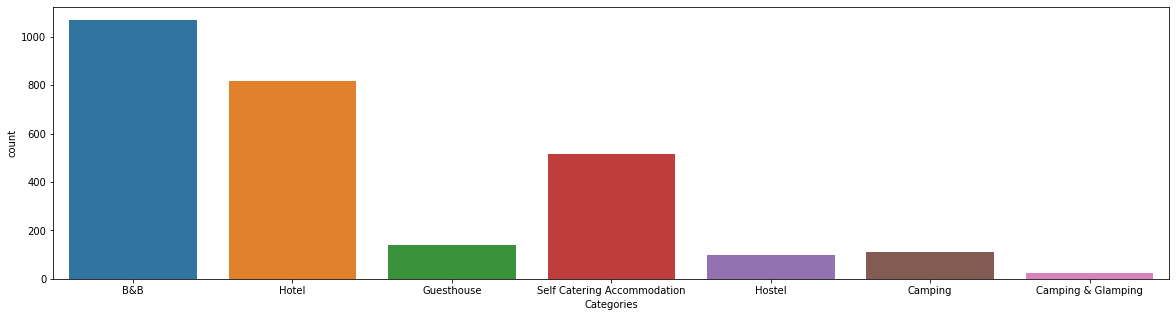

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.countplot(Ireland["Categories"][:])

In [ ]:
(Ireland
 .groupby('County')
 .Categories
 .value_counts()
 .unstack()
 .fillna(0)
 )

Categories,B&B,Camping,Camping & Glamping,Guesthouse,Hostel,Hotel,Self Catering Accommodation
County,,,,,,,
Carlow,8.0,0.0,0.0,1.0,1.0,7.0,8.0
Cavan,18.0,1.0,0.0,6.0,0.0,14.0,11.0
Clare,87.0,6.0,3.0,8.0,8.0,43.0,36.0
Cork,126.0,16.0,3.0,19.0,5.0,76.0,53.0
Donegal,74.0,11.0,2.0,4.0,13.0,55.0,60.0
Dublin,41.0,2.0,0.0,21.0,10.0,152.0,26.0
Galway,136.0,6.0,3.0,10.0,16.0,81.0,33.0
Kerry,179.0,17.0,3.0,24.0,16.0,76.0,63.0
Kildare,15.0,0.0,0.0,2.0,0.0,21.0,14.0


In [ ]:
Irish_Accommodation = (
  Ireland
 .groupby('Categories')
 .County
 .value_counts()
 .unstack()
 .fillna(0)
 )

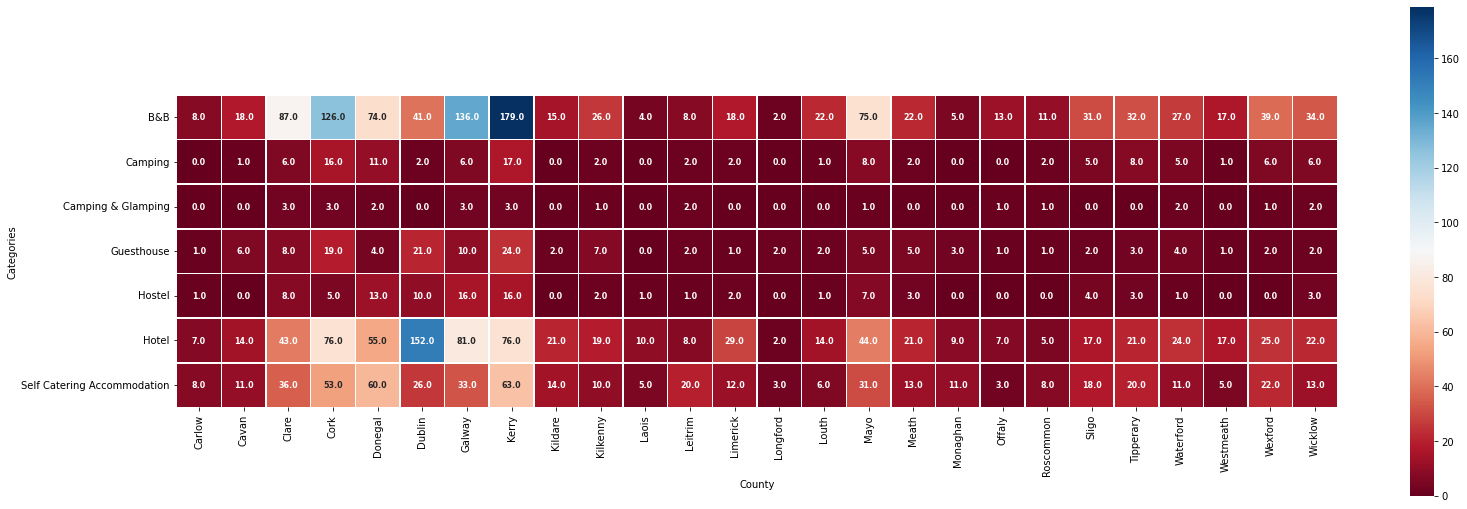

In [ ]:
plt.figure(figsize=(26,9))
sns.heatmap(Irish_Accommodation, cmap="RdBu", linewidth=.5, annot=True, square=True, fmt='0', annot_kws={'fontsize' : 8, 'fontweight' : 'bold'})

In [ ]:
data_2 = files.upload()

Saving Activities.csv to Activities.csv


In [ ]:
Activities = pd.read_csv('Activities.csv', header = 0, index_col= None)

In [ ]:
Activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        6318 non-null   object 
 1   Url                         5893 non-null   object 
 2   Telephone                   5743 non-null   object 
 3   Longitude                   6318 non-null   float64
 4   Latitude                    6318 non-null   float64
 5   AddressRegion               6314 non-null   object 
 6   AddressLocality             5375 non-null   object 
 7   AddressCountry              6318 non-null   object 
 8   Tags                        6236 non-null   object 
 9   Tours / Activity Operators  2547 non-null   object 
dtypes: float64(2), object(8)
memory usage: 493.7+ KB


In [ ]:
Activities.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags,Tours / Activity Operators
0,The Restaurant at the Abbey Hotel,http://www.abbeyhotel.ie/food-and-wine.html,3.54E+11,-8.193639,53.624876,Roscommon,NaN,Ireland,"Food and Drink,Restaurant",NaN
1,Café Nutshell,https://www.facebook.com/cafenutshell/,35351422777,-6.944210,52.395136,Wexford,New Ross,Republic of Ireland,"Covid Safety Charter,Food and Drink,Restaurant...",NaN
2,Guided Walking Tour of Sligo,NaN,NaN,-8.477043,54.268771,Sligo,Sligo Town,Republic of Ireland,"Walking,Activity Operator,Tour",Yes
3,The Italian Kitchen,http://theitaliankitchen.ie,+353(0)18711255,-6.218041,53.411898,Dublin,Clonshaugh,Ireland,"Food and Drink,Restaurant",NaN
4,Brasserie on the Corner,https://brasseriegalway.com,35391530333,-9.052901,53.274658,Galway,NaN,Ireland,"Covid Safety Charter,Food and Drink,Restaurant",NaN


In [ ]:
Activities.duplicated().sum()

14

In [ ]:
Activities.isnull().sum()

Name                             0
Url                            425
Telephone                      575
Longitude                        0
Latitude                         0
AddressRegion                    4
AddressLocality                943
AddressCountry                   0
Tags                            82
Tours / Activity Operators    3771
dtype: int64

In [ ]:
Activities = Activities.drop(['Url', 'Telephone', 'Longitude', 'Latitude','AddressLocality', 'AddressCountry' , 'Tags'], axis=1)

In [ ]:
Activities.head()

,Name,AddressRegion,Tours / Activity Operators
0,The Restaurant at the Abbey Hotel,Roscommon,NaN
1,Café Nutshell,Wexford,NaN
2,Guided Walking Tour of Sligo,Sligo,Yes
3,The Italian Kitchen,Dublin,NaN
4,Brasserie on the Corner,Galway,NaN


In [ ]:
Activities.isnull().sum()

Name                             0
AddressRegion                    4
Tours / Activity Operators    3771
dtype: int64

In [ ]:
Activities = Activities.dropna(subset = {"Tours / Activity Operators"})

In [ ]:
Activities.isnull().sum()

Name                          0
AddressRegion                 0
Tours / Activity Operators    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


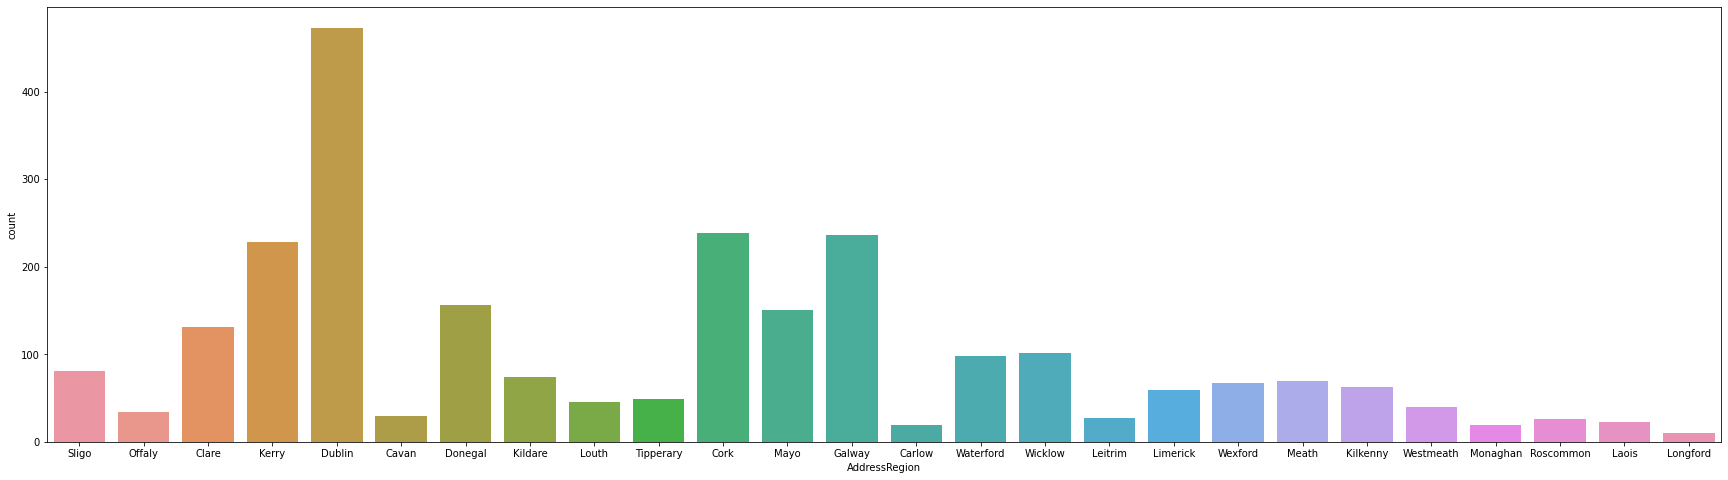

In [ ]:
fig = plt.figure(figsize = (30,8))
sns.countplot(Activities["AddressRegion"][:])